In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the train dataset

In [293]:
bcp = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [294]:
bcp

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [295]:
bcp.shape

(31647, 18)

Observations:

1) From the dataset it is seen that there are total more than 31000 rows and 18 columns in it. Which means we are having total 18 different attributes in a dataset and more than 31000 instances of it.

2) In the 18 columns 17 of them are independent variables and one is dependent varaible which is subscribed, hence it will be our target variable as well.

3) Most of the columns/attributes are categorical in nature for ie - job, marital status, education, housing, loan, contact, month, poutcome and subscribed. So after a certain stage we will convert this string categorical columns in float data type as models only understands the numbers.

4) Some of the columns suchf as contact, day etc can be removed from data as currently it seems like they might not be affecting the target variable directly.

5) ID no. column is also for identification purpose of customer hence we will change the column to index of our data set.

In [296]:
bcp.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [297]:
bcp.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [298]:
bcp.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31436,20288,30,management,single,tertiary,no,725,no,no,cellular,11,aug,69,4,-1,0,unknown,no
8919,39229,28,blue-collar,married,primary,no,519,yes,no,cellular,18,may,82,9,-1,0,unknown,no
28008,22314,33,technician,divorced,secondary,yes,6,no,no,cellular,22,aug,239,2,-1,0,unknown,no
30012,24967,42,management,single,tertiary,yes,130,yes,yes,cellular,18,nov,112,1,-1,0,unknown,no
12642,33069,38,admin.,married,primary,no,3913,yes,no,cellular,20,apr,196,2,315,2,failure,no


In [299]:
bcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


1) It is seen that there is no null values present in any of the columns which is very good thing for our data. It will help our model to learn things in a better way.

2) There are two types of values in the set, 1 - Integer dtype - There are total 8 columns in this data type and 2 - Object (string) - There are total 10 columns in this data type.

3) All of the columns whith object data type are in category, hence we will change the dtype of those columns at certain stage.

In [300]:
bcp.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

Here we can confirm that most of the columns are having categorical data and we will check those with graphs as well.

In [301]:
bcp.set_index(['ID'], inplace = True)

In [302]:
bcp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no


Here we have change our index with our ID column as informed before the column of ID is for identification purpose of customer hence we have set it to index of our data set.

Now we will be checking the unique values of categorical columns through graph.

In [303]:
bcp.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


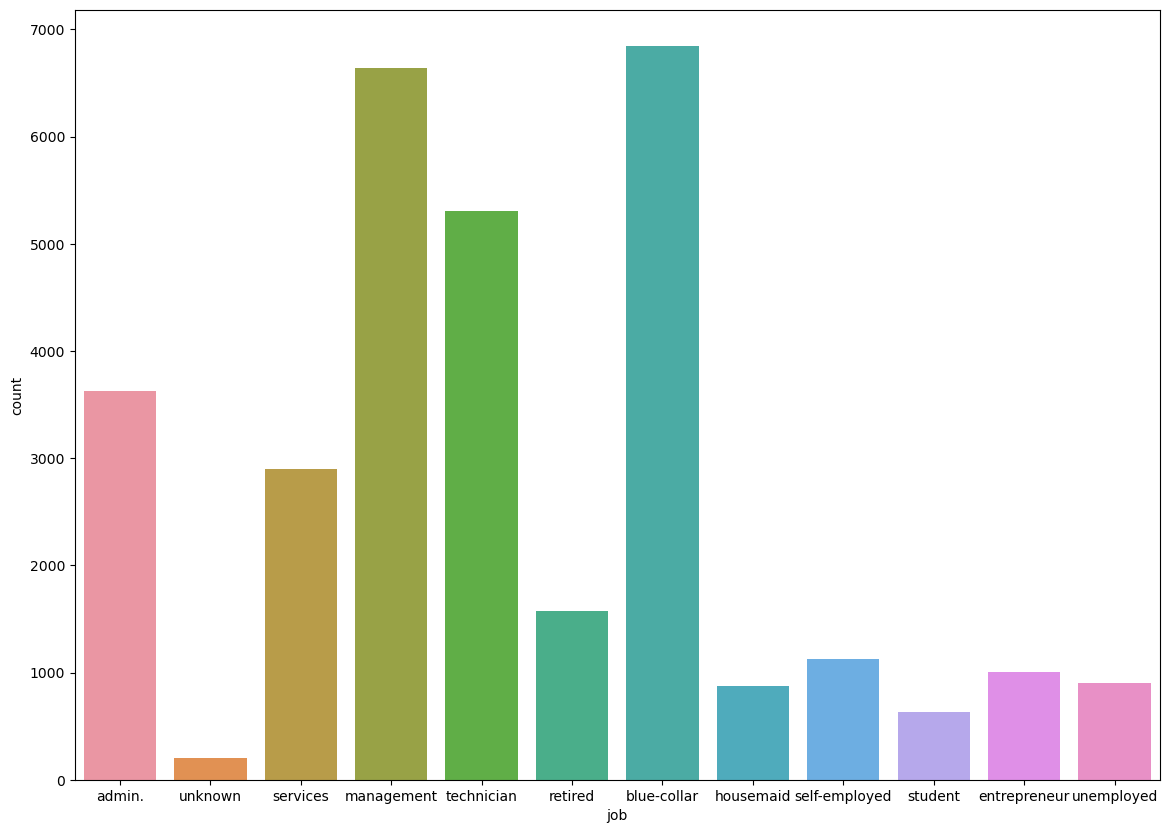

In [304]:
plt.figure(figsize = (14,10))
sns.countplot(bcp['job'])
plt.show()

So through graph it can be there is lot of difference in every job value, we will also check the excat numbers of it. Highest jobs in the column are listed under blue-collar.

In [305]:
bcp['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [306]:
bcp['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

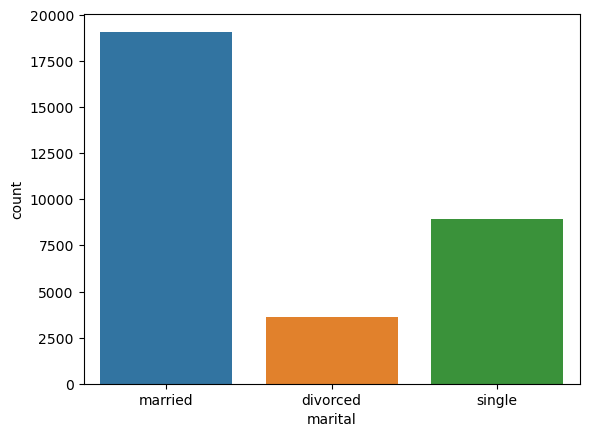

In [307]:
sns.countplot(bcp['marital'])

In marital column as well huge difference in values can be seen. The highest customer are married in the data.

In [308]:
bcp['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

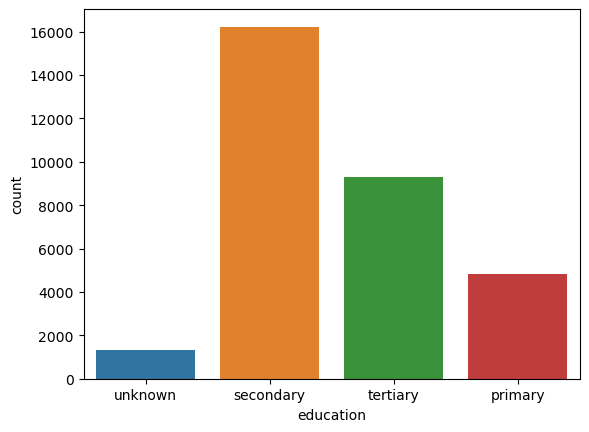

In [309]:
sns.countplot(bcp['education'])

The difference between the values can be seen in this column as well. The maximum number of customer's are having secondary education.

In [310]:
bcp.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [311]:
bcp['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

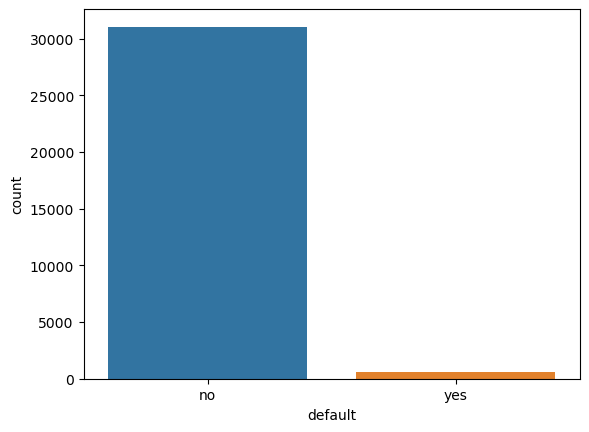

In [312]:
sns.countplot(bcp['default'])

A huge difference can be seen in no. of defaulters in the set. The High no. in No suggests that there are more customers in the bank who are not bank defaulters.

In [313]:
bcp['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

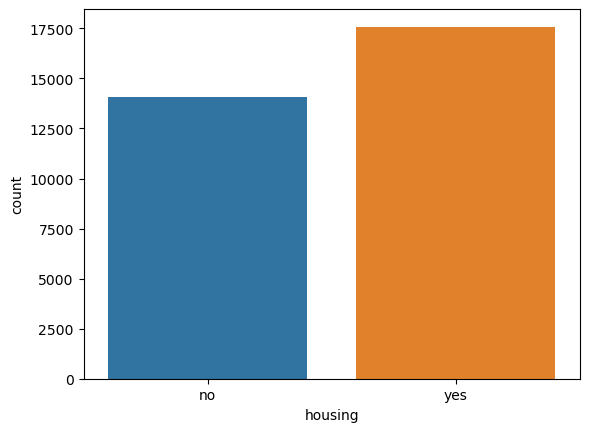

In [314]:
sns.countplot(bcp['housing'])

In this columnn it can be seen that there is difference between customers who are having the housing loan and who are not having hosuing loan from bank but it is less as compared to other columns.

In [315]:
bcp.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

In [316]:
bcp['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

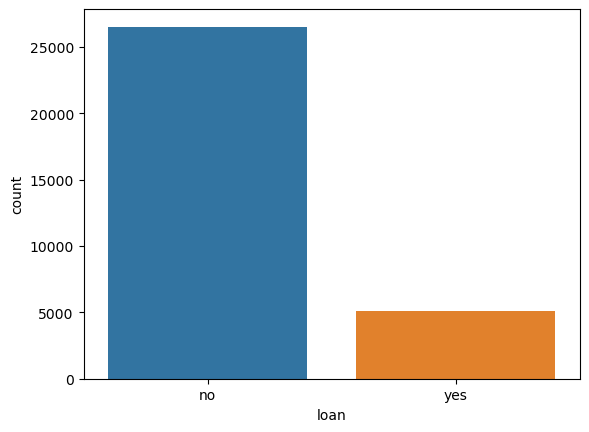

In [317]:
sns.countplot(bcp['loan'])

Here we can see that there are less no. of customers who have opted for personal loan from the bank and the difference is very high as compared to housing loan.

In [318]:
bcp['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

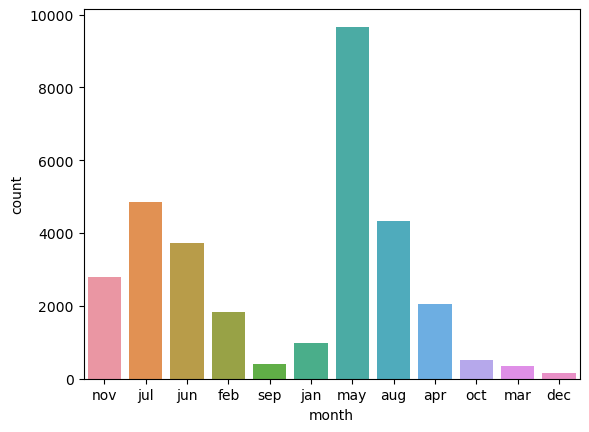

In [319]:
sns.countplot(bcp['month'])

So, we can see that the customers are contact highest in May followed July and August and are least contacted in December.

In [320]:
bcp['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

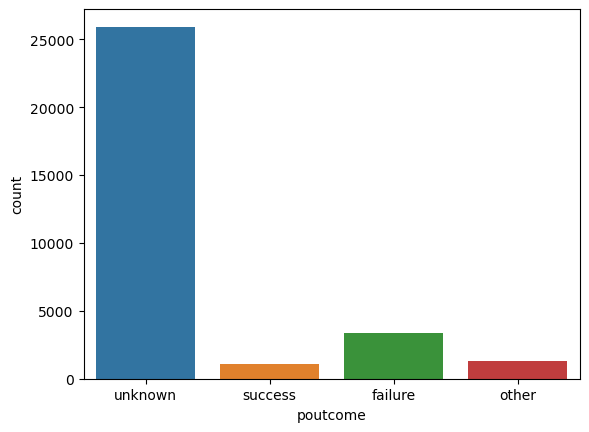

In [321]:
sns.countplot(bcp['poutcome'])

Here we can see that the outcome of the previous campain is unknown and the customers with success outcome are atleast.

In [322]:
bcp['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subscribed', ylabel='count'>

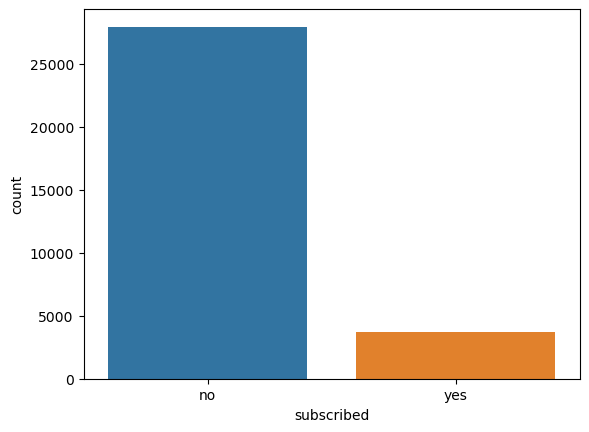

In [323]:
sns.countplot(bcp['subscribed'])

This is our target varaible, here we can see that customers have not subscribed in very much high numbers as compared to those who have subsribed.

Observation:
    
So from all the value counts and the countplots it can be seen that the data is imbalanced across all the columns, hence we will have to balance the data at certain stage of the project.

Now we will check the details of the columns who are in number format.

In [324]:
bcp.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observations:
    
1) So the columns which are in number format are age, balance, day, duration, campain, pdays and previous.

2) For the column age the standard deviation is high which suggests the outliers, the difference between the 75% and maximum value is also high which also suggests the outliers in column.

3) For column balance standard deviation is high and difference between 75% and maximum values which suggests the outliers.

4) For column day as well the standarf deviation and difference btween 75% and maximum value is high which is suggesting outliers in this column as well.

5) In the same way all the other columns are having the standard deviation and the high difference between 75 perecentile and maximum values which suggests the outliers in them as well.

1) We will not be checking the skewness in the columns as the and overall data is a categorical data and removing the skewness of these columns will result in our model not learning the data properly.

2) In the same way we will not be removing the outliers from the data as this is classification case and a most of the categorical hence outliers will not effect the prediction rather the model might learn properly through them.

In [325]:
bcp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no


In [326]:
bcp2 = pd.DataFrame(bcp)

In [327]:
bcp2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no


In [328]:
bcp2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no


Now we will be checking the correation of all the columns with our target variables.

Before that we will have to convert the string values in th float or int format.

In [329]:
from sklearn.preprocessing import OrdinalEncoder

In [330]:
oe = OrdinalEncoder()

for i in bcp2.columns:
    if bcp2[i].dtypes == 'object':
        bcp2[i] = oe.fit_transform(bcp2[i].values.reshape(-1,1))        

In [331]:
bcp2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0


Here we have changed our string values in the float values. So now we can go ahead and check the correlation between the columns and our target variable.

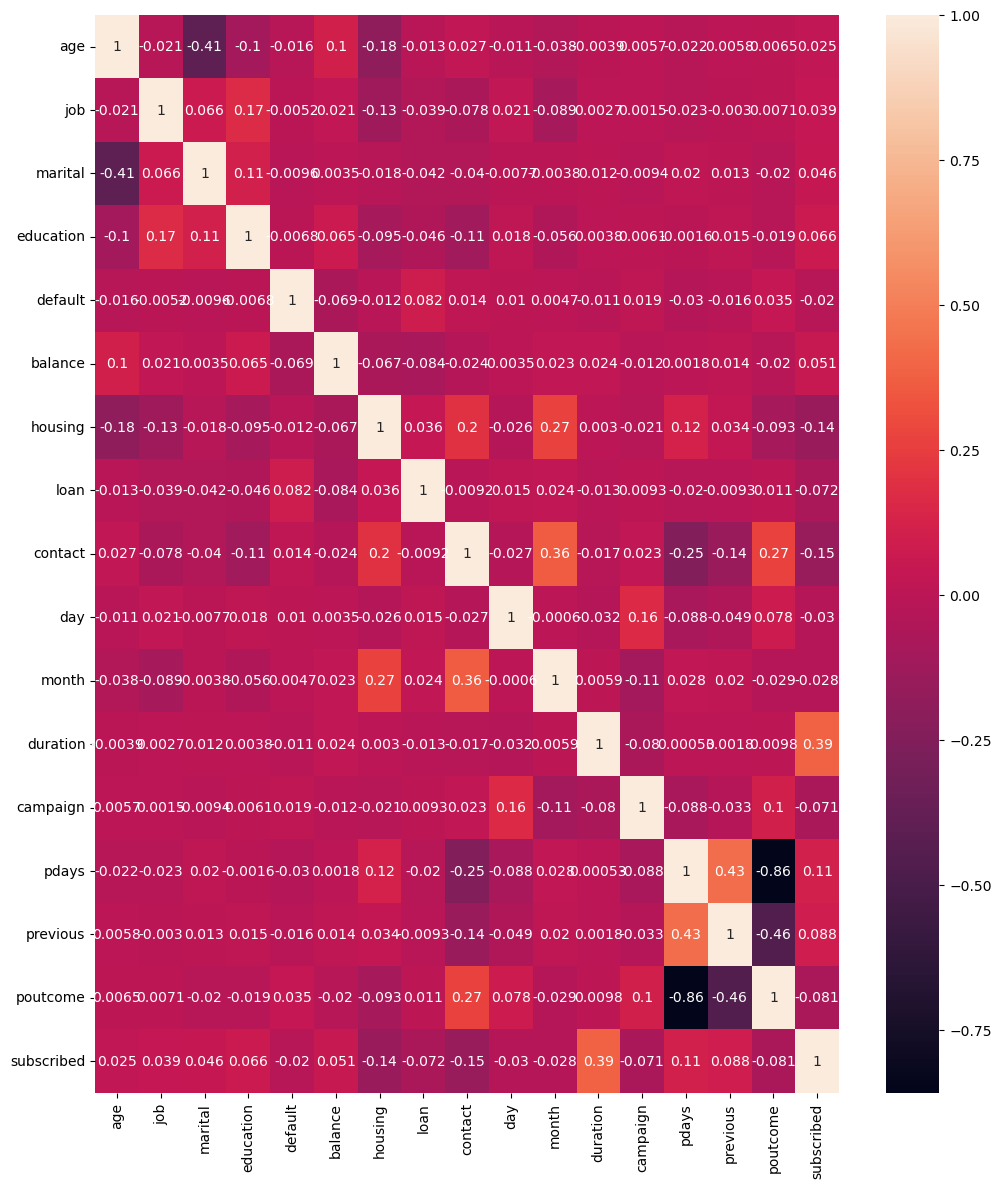

In [332]:
plt.figure(figsize = (12,14))
sns.heatmap(bcp2.corr(), annot = True)
plt.show()

So, through heaatmap it can be seen that all the columns are neigther having a strong positive correlation nor strong negative corrlation.

In [333]:
bcp2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

As these are the categorical data and the target variable is also a classification and categorized the ploting of correlation is best viewed in Heatmmap only.

In [334]:
bcp2.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [335]:
x = bcp2.iloc[:,:-1]
y = bcp2.iloc[:,-1]

In [336]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0
40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0
15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0
43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0
29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0
40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0
19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0


In [337]:
x.shape

(31647, 16)

In [338]:
y

ID
26110    0.0
40576    0.0
15320    0.0
43962    1.0
29842    0.0
        ... 
36483    0.0
40178    1.0
19710    0.0
38556    0.0
14156    1.0
Name: subscribed, Length: 31647, dtype: float64

In [339]:
y.shape

(31647,)

As we already have a huge amount of data set we cannot use the over fiiting method over here to balance the class of the variables hence over here we will use a under fitting method which will decrease the data size and will balance the data as well.

In [340]:
from imblearn.under_sampling import RandomUnderSampler

In [341]:
rus = RandomUnderSampler()
x_resam, y_resam = rus.fit_resample(x,y)

In [342]:
bcp_resam = pd.DataFrame(x_resam, columns = x.columns)

In [343]:
bcp_resam['subscribed'] = y_resam

In [344]:
bcp_resam

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
10072,54,9.0,1.0,1.0,0.0,2500,0.0,0.0,2.0,11,6.0,62,2,-1,0,3.0,0.0
29754,43,0.0,1.0,2.0,0.0,1317,1.0,0.0,0.0,4,3.0,112,1,-1,0,3.0,0.0
8821,23,9.0,2.0,1.0,0.0,-306,1.0,0.0,2.0,4,6.0,217,2,-1,0,3.0,0.0
30174,43,4.0,2.0,1.0,0.0,1063,1.0,0.0,0.0,5,3.0,141,3,-1,0,3.0,0.0
13549,49,9.0,2.0,1.0,0.0,-120,1.0,1.0,0.0,9,5.0,100,5,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33754,65,4.0,0.0,2.0,0.0,90,1.0,0.0,0.0,22,0.0,416,1,-1,0,3.0,1.0
44152,79,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,13,5.0,617,1,377,1,2.0,1.0
5195,33,1.0,1.0,1.0,0.0,0,1.0,0.0,2.0,21,8.0,521,3,-1,0,3.0,1.0


In [345]:
bcp_resam['subscribed'].value_counts()

0.0    3715
1.0    3715
Name: subscribed, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subscribed', ylabel='count'>

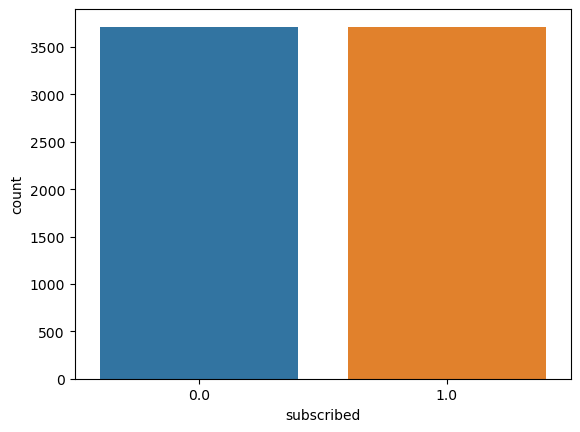

In [346]:
sns.countplot(bcp_resam['subscribed'])

So, We have used a underfitting method and reduce the size of data as well as we have also resampled it equally so that our model will learn the data properly.

In [347]:
x1 = bcp_resam.iloc[:,:-1]
y1 = bcp_resam.iloc[:,-1]

In [348]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
10072,54,9.0,1.0,1.0,0.0,2500,0.0,0.0,2.0,11,6.0,62,2,-1,0,3.0
29754,43,0.0,1.0,2.0,0.0,1317,1.0,0.0,0.0,4,3.0,112,1,-1,0,3.0
8821,23,9.0,2.0,1.0,0.0,-306,1.0,0.0,2.0,4,6.0,217,2,-1,0,3.0
30174,43,4.0,2.0,1.0,0.0,1063,1.0,0.0,0.0,5,3.0,141,3,-1,0,3.0
13549,49,9.0,2.0,1.0,0.0,-120,1.0,1.0,0.0,9,5.0,100,5,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33754,65,4.0,0.0,2.0,0.0,90,1.0,0.0,0.0,22,0.0,416,1,-1,0,3.0
44152,79,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,13,5.0,617,1,377,1,2.0
5195,33,1.0,1.0,1.0,0.0,0,1.0,0.0,2.0,21,8.0,521,3,-1,0,3.0


In [349]:
x1.shape

(7430, 16)

In [350]:
y1

ID
10072    0.0
29754    0.0
8821     0.0
30174    0.0
13549    0.0
        ... 
33754    1.0
44152    1.0
5195     1.0
40178    1.0
14156    1.0
Name: subscribed, Length: 7430, dtype: float64

In [351]:
y1.shape

(7430,)

In [352]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x2 = pd.DataFrame(sc.fit_transform(x1), columns = x1.columns)

In [353]:
x2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.061257,1.407716,-0.314458,-0.384786,-0.12145,0.269182,-0.944473,-0.377325,1.869403,-0.530672,0.179502,-0.897433,-0.184487,-0.490254,-0.384047,0.529306
1,0.143138,-1.390143,-0.314458,0.954305,-0.12145,-0.079241,1.058791,-0.377325,-0.587857,-1.367120,-0.762378,-0.754803,-0.559724,-0.490254,-0.384047,0.529306
2,-1.526169,1.407716,1.274947,-0.384786,-0.12145,-0.557255,1.058791,-0.377325,1.869403,-1.367120,0.179502,-0.455279,-0.184487,-0.490254,-0.384047,0.529306
3,0.143138,-0.146650,1.274947,-0.384786,-0.12145,-0.154051,1.058791,-0.377325,-0.587857,-1.247628,-0.762378,-0.672077,0.190749,-0.490254,-0.384047,0.529306
4,0.643930,1.407716,1.274947,-0.384786,-0.12145,-0.502474,1.058791,2.650237,-0.587857,-0.769658,-0.134458,-0.789034,0.941222,-0.490254,-0.384047,0.529306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,1.979376,-0.146650,-1.903864,0.954305,-0.12145,-0.440624,1.058791,-0.377325,-0.587857,0.783746,-1.704257,0.112390,-0.559724,-0.490254,-0.384047,0.529306
7426,3.147890,0.164223,-1.903864,-1.723877,-0.12145,0.353711,-0.944473,-0.377325,0.640773,-0.291687,-0.134458,0.685764,-0.559724,2.946889,0.084734,-0.459815
7427,-0.691515,-1.079270,-0.314458,-0.384786,-0.12145,-0.467131,1.058791,-0.377325,1.869403,0.664253,0.807422,0.411913,0.190749,-0.490254,-0.384047,0.529306
7428,0.977791,-0.146650,-1.903864,0.954305,-0.12145,-0.355211,-0.944473,2.650237,-0.587857,-1.247628,0.179502,0.175147,-0.184487,-0.490254,-0.384047,0.529306


So we have scaled our independent variables using standard scaler so that the biasedness of the vairables is removed.

In [354]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [355]:
vif = pd.DataFrame()

vif['Values'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns

In [356]:
vif

,Values,Features
0,1.360241,age
1,1.049058,job
2,1.292189,marital
3,1.073047,education
4,1.011351,default
5,1.031577,balance
6,1.186005,housing
7,1.025682,loan
8,1.255913,contact
9,1.022309,day


Here we can see that the variance inflaation factor for all the independent variables seems to be in a controled or a good limit. Hence we are not going to drop any of the columns from this and will move ahead with implementing various models on it.

First we will search for our best random score for train_test_split.

In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [358]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

In [359]:
maxacc = 0
maxrs = 0

for i in range(0,200):
    gbc = GradientBoostingClassifier()
    x_train, x_test, y_train, y_test = train_test_split(x2,y1, test_size = 0.20, random_state = i)
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print('The best accuracy is',maxacc.round(2),'at the random stage', maxrs)

The best accuracy is 0.88 at the random stage 44


Hence our best random state for this data would be 196. Now we will check implementing the other models on data as well.

In [360]:
x_train, x_test, y_train, y_test = train_test_split(x2,y1, test_size = 0.20, random_state = maxrs)

In [361]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
lgpred = lg.predict(x_test)
lgacc = accuracy_score(y_test, lgpred)
lgcon = confusion_matrix(y_test, lgpred)
lgclass = classification_report(y_test, lgpred)

print('The accuracy for Logistic Regression is', lgacc.round(2))
print(lgcon)
print(lgclass)

The accuracy for Logistic Regression is 0.81
[[607 134]
 [155 590]]
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       741
         1.0       0.81      0.79      0.80       745

    accuracy                           0.81      1486
   macro avg       0.81      0.81      0.81      1486
weighted avg       0.81      0.81      0.81      1486



In [362]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
rfcpred = rfc.predict(x_test)
rfcacc = accuracy_score(y_test, rfcpred)
rfccon = confusion_matrix(y_test, rfcpred)
rfcclass = classification_report(y_test, rfcpred)

print('The accuracy for Random Forest Classifier is', rfcacc.round(2))
print(rfccon)
print(rfcclass)

The accuracy for Random Forest Classifier is 0.87
[[612 129]
 [ 70 675]]
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86       741
         1.0       0.84      0.91      0.87       745

    accuracy                           0.87      1486
   macro avg       0.87      0.87      0.87      1486
weighted avg       0.87      0.87      0.87      1486



In [363]:
etc = ExtraTreesClassifier()

etc.fit(x_train, y_train)
etcpred = etc.predict(x_test)
etcacc = accuracy_score(y_test, etcpred)
etccon = confusion_matrix(y_test, etcpred)
etcclass = classification_report(y_test, etcpred)

print('The accuracy for Extra Trees Classifier is', etcacc.round(2))
print(etccon)
print(etcclass)

The accuracy for Extra Trees Classifier is 0.85
[[613 128]
 [ 94 651]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       741
         1.0       0.84      0.87      0.85       745

    accuracy                           0.85      1486
   macro avg       0.85      0.85      0.85      1486
weighted avg       0.85      0.85      0.85      1486



In [364]:
svc = SVC()

svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
svcacc = accuracy_score(y_test, svcpred)
svccon = confusion_matrix(y_test, svcpred)
svcclass = classification_report(y_test, svcpred)

print('The accuracy for Support Vector classifier is ', svcacc.round(2))
print(svccon)
print(svcclass)

The accuracy for Support Vector classifier is  0.83
[[601 140]
 [112 633]]
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       741
         1.0       0.82      0.85      0.83       745

    accuracy                           0.83      1486
   macro avg       0.83      0.83      0.83      1486
weighted avg       0.83      0.83      0.83      1486



In [365]:
gbc.fit(x_train, y_train)
gbcpred = gbc.predict(x_test)
gbcacc = accuracy_score(y_test, gbcpred)
gbccon = confusion_matrix(y_test, gbcpred)
gbcclass = classification_report(y_test, gbcpred)

print('The accuracy for Gradient Boosting Classifier is',gbcacc.round(2))
print(gbccon)
print(gbcclass)

The accuracy for Gradient Boosting Classifier is 0.88
[[627 114]
 [ 71 674]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       741
         1.0       0.86      0.90      0.88       745

    accuracy                           0.88      1486
   macro avg       0.88      0.88      0.88      1486
weighted avg       0.88      0.88      0.88      1486



In [366]:
adc = AdaBoostClassifier()

adc.fit(x_train,y_train)
adcpred = adc.predict(x_test)
adcacc = accuracy_score(y_test, adcpred)
adccon = confusion_matrix(y_test, adcpred)
adcclass = classification_report(y_test, adcpred)

print('The accuracy score for Adaboost Classifier is',adcacc.round(2))
print(adccon)
print(adcclass)

The accuracy score for Adaboost Classifier is 0.85
[[622 119]
 [111 634]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       741
         1.0       0.84      0.85      0.85       745

    accuracy                           0.85      1486
   macro avg       0.85      0.85      0.85      1486
weighted avg       0.85      0.85      0.85      1486



In [367]:
bc = BaggingClassifier()

bc.fit(x_train, y_train)
bcpred = bc.predict(x_test)
bcacc = accuracy_score(y_test, bcpred)
bccon = confusion_matrix(y_test, bcpred)
bcclass = classification_report(y_test, bcpred)

print('The accuracy for Bagging Classifier is', bcacc.round(2))
print(bccon)
print(bcclass)

The accuracy for Bagging Classifier is 0.85
[[625 116]
 [112 633]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       741
         1.0       0.85      0.85      0.85       745

    accuracy                           0.85      1486
   macro avg       0.85      0.85      0.85      1486
weighted avg       0.85      0.85      0.85      1486



In [368]:
from sklearn.neighbors import KNeighborsClassifier

In [369]:
knc = KNeighborsClassifier()

knc.fit(x_train, y_train)
kncpred = knc.predict(x_test)
kncacc = accuracy_score(y_test, kncpred)
knccon = confusion_matrix(y_test, kncpred)
kncclass = classification_report(y_test, kncpred)

print('The accuracy score for KNeighbors Classifier is', kncacc.round(2))
print(knccon)
print(kncclass)

The accuracy score for KNeighbors Classifier is 0.78
[[604 137]
 [188 557]]
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       741
         1.0       0.80      0.75      0.77       745

    accuracy                           0.78      1486
   macro avg       0.78      0.78      0.78      1486
weighted avg       0.78      0.78      0.78      1486



C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


As we have got highest accuracy of 86% we will also check the cross validation score for each model.

In [370]:
s = cross_val_score(lg, x2,y1)
print(s)
print(s.mean())
print(lgacc)

print('The difference between accuracy score and cross val score of Logistic Regression is', lgacc - s.mean())

[0.79407806 0.79811575 0.78802153 0.79138627 0.80417227]
0.7951547779273216
0.8055181695827726
The difference between accuracy score and cross val score of Logistic Regression is 0.01036339165545097


In [371]:
s1 = cross_val_score(rfc,x2,y1)
print(s1)
print(s1.mean())
print(rfcacc)

print('The difference between accuracy score and cross val score of Random Forest Classifier is', rfcacc - s1.mean())

[0.85531629 0.84118439 0.85464334 0.84185734 0.84051144]
0.8467025572005383
0.8660834454912517
The difference between accuracy score and cross val score of Random Forest Classifier is 0.019380888290713383


In [372]:
s2 = cross_val_score(etc,x2,y1)
print(s2) 
print(s2.mean())
print(etcacc)

print('The difference between accuracy score and cross val score of Extra Trees Classifier is', etcacc - s2.mean()) 

[0.85329744 0.84253028 0.83647376 0.82637954 0.82974428]
0.8376850605652759
0.8506056527590848
The difference between accuracy score and cross val score of Extra Trees Classifier is 0.012920592193808922


In [373]:
s3 = cross_val_score(svc,x2,y1)
print(s3)
print(s3.mean())
print(svcacc)

print('The difference between accuracy score and cross val score of Support vector classifier is', svcacc - s3.mean())

[0.82166891 0.80888291 0.82099596 0.8115747  0.81830417]
0.8162853297442798
0.8304172274562585
The difference between accuracy score and cross val score of Support vector classifier is 0.014131897711978647


In [374]:
s4 = cross_val_score(gbc,x2,y1)
print(s4)
print(s4.mean())
print(gbcacc)

print('The difference between accuracy score and cross val score of Gradient Boosting Classifier is', gbcacc - s4.mean())

[0.8526245  0.83647376 0.85329744 0.83580081 0.84791386]
0.8452220726783312
0.8755047106325706
The difference between accuracy score and cross val score of Gradient Boosting Classifier is 0.030282637954239466


In [375]:
s5 = cross_val_score(adc,x2,y1)
print(s5)
print(s5.mean())
print(adcacc)

print('The difference between accuracy score and cross val score of Ada Boost Classifier is', adcacc - s5.mean())

[0.83041723 0.83580081 0.82705249 0.82166891 0.82974428]
0.8289367429340512
0.845222072678331
The difference between accuracy score and cross val score of Ada Boost Classifier is 0.016285329744279875


In [376]:
s6 = cross_val_score(bc,x2,y1)
print(s6)
print(s6.mean())
print(bcacc)

print('The difference between accuracy score and cross val score of Bagging Classifier is', bcacc - s6.mean())

[0.8384926  0.82637954 0.81561238 0.81561238 0.83378197]
0.8259757738896367
0.8465679676985195
The difference between accuracy score and cross val score of Bagging Classifier is 0.020592193808882775


In [377]:
s7 = cross_val_score(knc,x2,y1)
print(s7)
print(s7.mean())
print(kncacc)

print('The difference between accuracy score and cross val score of KNeighbors Classifier is', kncacc - s7.mean())

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

[0.78398385 0.77388964 0.76716016 0.75100942 0.76985195]
0.769179004037685
0.7812920592193809
The difference between accuracy score and cross val score of KNeighbors Classifier is 0.01211305518169592


C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


So, through the cross val score the final model which can be selected is Gradient Boosting Classifier which is having the highest accuracy and also there is not much difference between cross val socre and acccuracy socre of the model.

We will be doind the hyper parameter boosting to enhance the accuracy of our best model and increase the accuracy as much as possible.

In [378]:
from sklearn.model_selection import GridSearchCV

In [379]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]}

In [380]:
gcv = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5)

In [381]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [382]:
gcv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [383]:
fm = GradientBoostingClassifier(max_depth = 3,min_samples_leaf = 3, min_samples_split = 2,n_estimators = 150 )

In [384]:
fm.fit(x_train, y_train)
fmpred = fm.predict(x_test)
fmacc = accuracy_score(y_test, fmpred)
fmcon = confusion_matrix(y_test, fmpred)
fmclass = classification_report(y_test, fmpred)

print('The Accuracy for final model is', fmacc.round(2))
print(fmcon)
print(fmclass)

The Accuracy for final model is 0.88
[[630 111]
 [ 65 680]]
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       741
         1.0       0.86      0.91      0.89       745

    accuracy                           0.88      1486
   macro avg       0.88      0.88      0.88      1486
weighted avg       0.88      0.88      0.88      1486



Saving the Final model

In [385]:
import joblib

In [386]:
joblib.dump(fm, 'Bank Customer Prediction')

['Bank Customer Prediction']

In [387]:
model = joblib.load('Bank Customer Prediction')

In [388]:
predict = model.predict(x_test)

In [389]:
a = np.array(y_test)

In [390]:
df = pd.DataFrame()
df['Predicted'] = predict
df['Original'] = a

In [391]:
df

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
1481,0.0,0.0
1482,0.0,0.0
1483,1.0,1.0
1484,0.0,0.0


Now we will be loading our Test data on which we need to actually predict whether the customer will subscribe for deposit or not.

In [467]:
bcp_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [468]:
bcp_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [469]:
bcp_test.shape

(13564, 17)

In our test data set we are having total of 17 no. of columns which can be called as attributes and more than 13500 instances are there in the data set.

In [470]:
bcp_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [471]:
bcp_test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [472]:
bcp_test.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1675,36602,58,entrepreneur,married,secondary,no,670,yes,no,cellular,12,may,1272,1,-1,0,unknown
4352,23650,48,housemaid,married,primary,no,0,no,no,cellular,28,aug,20,23,-1,0,unknown
6836,24363,51,blue-collar,married,secondary,no,-355,yes,yes,cellular,17,nov,122,2,-1,0,unknown
2729,32314,38,technician,married,tertiary,no,1004,yes,no,cellular,16,apr,444,2,-1,0,unknown
2148,32335,38,technician,divorced,secondary,no,0,yes,no,cellular,16,apr,867,1,-1,0,unknown


In [473]:
bcp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


1) Here we can see that there are no-null values in any of the columns so no need to feel any of the values in any columns.

2) There are 2 types of data in the set 1 - integer and 2 - object.

In [474]:
bcp_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [475]:
bcp_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


Observations:
    
1) As in the testing data set the standard deviation for all the columns is very high but we will not try to remove the outliers as most of the columns are the categorical columns.

2) The difference between the 75% and the maximum values for all the columns is also very high but as suggested earlier the outliers could not be removed as most of the columns are in categorical values.

3) The count of all the columns in similar which is a very good thing for a data.

4) No negative values or null values seen hence no data has to be removed or filled in the data set.

In [476]:
bcp.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

So, as it was in training data set most of the columns are categorical hence we will check them individually about there no. of unique values.

In [477]:
bcp_test.set_index(['ID'], inplace = True)

In [478]:
bcp_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown


In [479]:
bcp_test.nunique()

age            75
job            12
marital         3
education       4
default         2
balance      4292
housing         2
loan            2
contact         3
day            31
month          12
duration     1201
campaign       40
pdays         422
previous       33
poutcome        4
dtype: int64

In [480]:
bcp_test['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


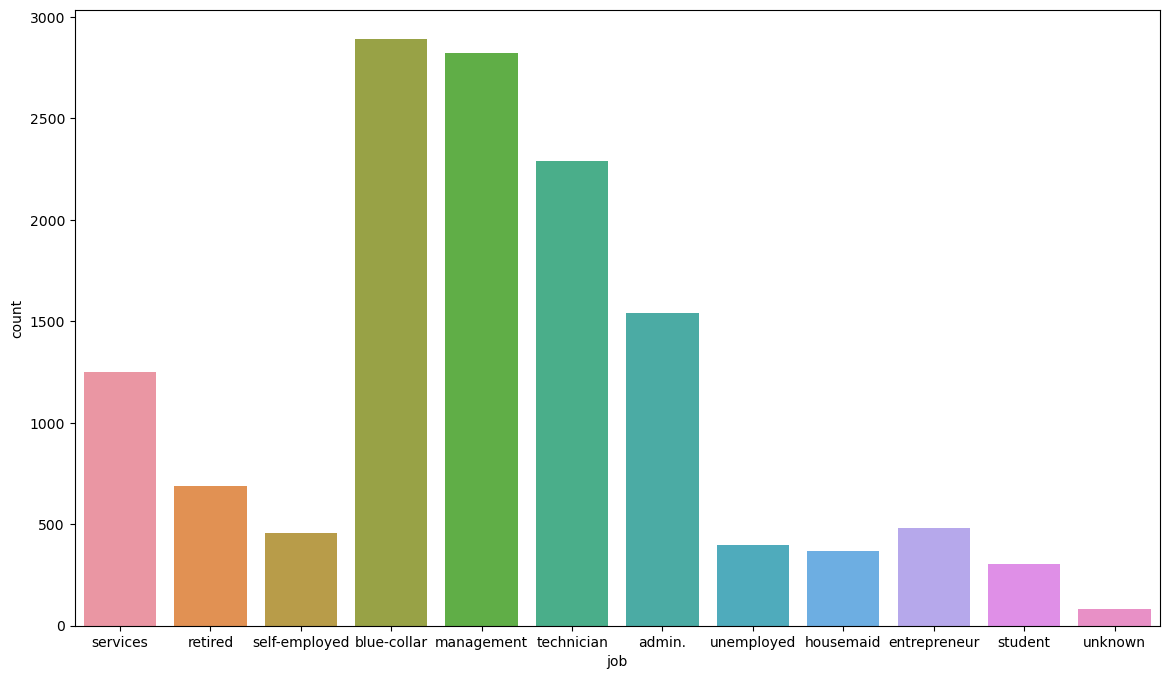

In [481]:
plt.figure(figsize = (14,8))
sns.countplot(bcp_test['job'])
plt.show()

So, here we can see that there is major difference between most of the job types, highest jobs are blue-collar followed by management and technician and the lowest are the student and unknown.

In [482]:
bcp_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [483]:
bcp_test['marital'].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

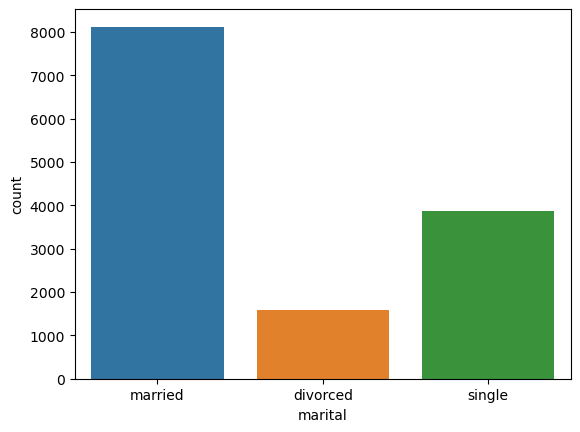

In [484]:
sns.countplot(bcp_test['marital'])

High difference can be seen in 3 unique values of the columns as the married customer are more then double of other two classes.

In [485]:
bcp_test.nunique()

age            75
job            12
marital         3
education       4
default         2
balance      4292
housing         2
loan            2
contact         3
day            31
month          12
duration     1201
campaign       40
pdays         422
previous       33
poutcome        4
dtype: int64

In [486]:
bcp_test['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

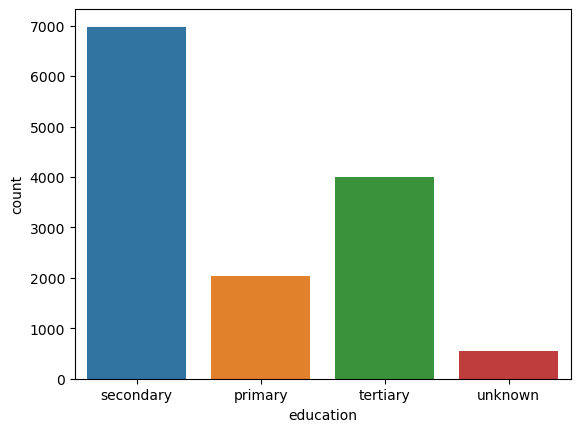

In [487]:
sns.countplot(bcp_test['education'])

In the education column as well the difference between the classes is very high. Customers having the secondary education are the highest in the data.

In [488]:
bcp_test['default'].value_counts()

no     13334
yes      230
Name: default, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

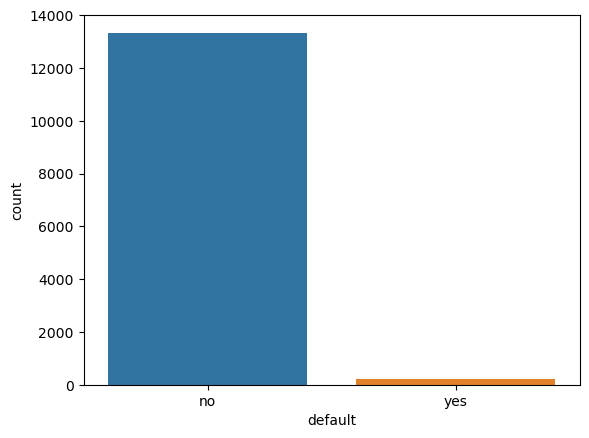

In [489]:
sns.countplot(bcp_test['default'])

A huge difference between 2 classes of this attribute can be seen. The customers who are not bank defaulters are very much higher which is a good thing for a bank.

In [490]:
bcp_test['housing'].value_counts()

yes    7546
no     6018
Name: housing, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

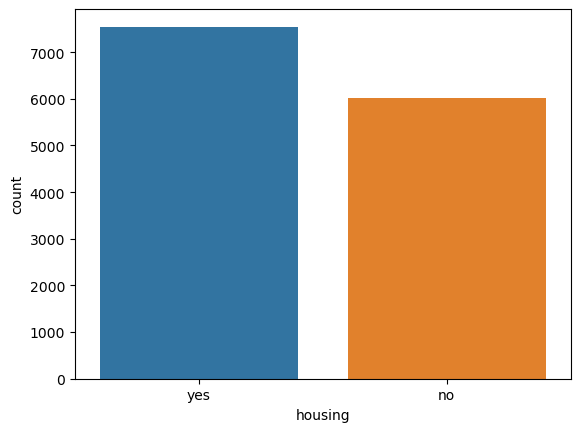

In [491]:
sns.countplot(bcp_test['housing'])

The no. of customers having the housing loan are more then customers not having the housing loan. The difference between 2 classes can be seen but it is not high as other columns in data.

In [492]:
bcp_test.nunique()

age            75
job            12
marital         3
education       4
default         2
balance      4292
housing         2
loan            2
contact         3
day            31
month          12
duration     1201
campaign       40
pdays         422
previous       33
poutcome        4
dtype: int64

In [493]:
bcp_test['loan'].value_counts()

no     11451
yes     2113
Name: loan, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

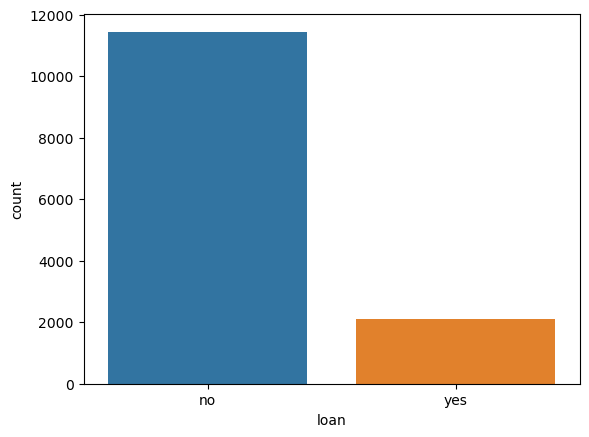

In [494]:
sns.countplot(bcp_test['loan'])

The customers who have not taken personal loan are pretty much higher as compared to the customers who have opted for the personal from the bank.

In [495]:
bcp_test['poutcome'].value_counts()

unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

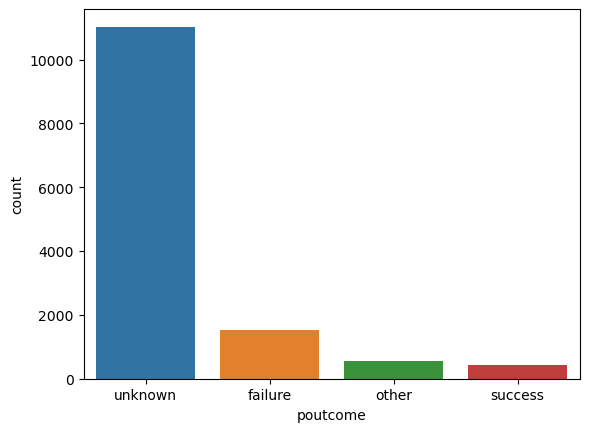

In [496]:
sns.countplot(bcp_test['poutcome'])

A huge difference between the classes can be seen as for the maximum number of customer the outcome of the previous campaign is not known.

In [497]:
bcp_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown


Now we will be changing the data type of the columns who are in object, as the model will only understand the numbers.

In [498]:
for i in bcp_test.columns:
    if bcp_test[i].dtypes == 'object':
        bcp_test[i] = oe.fit_transform(bcp_test[i].values.reshape(-1,1))

In [499]:
bcp_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0


Now we will scale our data using the Standard Sclaer after which we will be ready to implement a model on this data set.

In [500]:
bcp_test1 = pd.DataFrame(sc.fit_transform(bcp_test), columns = bcp_test.columns)

In [501]:
bcp_test1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.402389,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-0.921849,1.058702,-0.418199,-0.297500,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.463375,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.439963,-0.574850,-0.418199,-0.297500,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.393955,0.893033,-0.429564,1.531969,0.031534,0.829938,1.616074,-0.574850,-0.418199,-0.297500,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.784508,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.747754,-0.248140,-0.418199,-0.297500,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-0.669352,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.569789,-0.574850,-0.418199,-0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,-0.108636,-0.276592,1.040875,-0.131336,-0.426069,-1.119779,-0.429564,-0.704444,1.479434,-1.493340,-0.426644,0.405281,-0.418199,-0.297500,0.452163
13560,1.236630,-1.024823,-0.276592,-1.642982,-0.131336,0.299239,0.893033,-0.429564,1.531969,0.514168,0.166144,-0.387957,-0.574850,-0.418199,-0.297500,0.452163
13561,-0.555195,0.196760,-0.276592,-1.642982,-0.131336,-0.348218,0.893033,-0.429564,-0.704444,1.600092,-0.497650,-0.473070,-0.574850,-0.418199,-0.297500,0.452163
13562,-1.121034,-1.330219,1.360988,-0.301053,-0.131336,-0.290155,-1.119779,-0.429564,-0.704444,-0.813073,1.161835,-0.194517,-0.248140,0.483926,1.203911,-0.542830


In [502]:
predy = model.predict(bcp_test1)

In [503]:
predy

array([0., 1., 1., ..., 0., 1., 1.])

In [506]:
bcp_test['Predicted Subscription'] = predy

In [511]:
bcp_test.drop(['Predicted Values'],axis =1, inplace = True)
bcp_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Predicted Subscription
ID,,,,,,,,,,,,,,,,,
38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0,0.0
40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0,1.0
3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0,1.0
37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0,0.0
12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0,1.0
11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0,0.0
28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0,0.0


In [513]:
bcp_test['Predicted Subscription'].replace(0,'No',inplace = True)
bcp_test['Predicted Subscription'].replace(1,'Yes',inplace = True)

In [514]:
bcp_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Predicted Subscription
ID,,,,,,,,,,,,,,,,,
38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0,No
40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0,Yes
3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0,Yes
37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0,No
12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0,Yes
11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0,No
28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0,No
